## Analyzing Supermarket sales data

### By Tsuma Mwadzuya


## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#assessing">Assessing</a></li>
<li><a href="#cleaning">Cleaning</a></li>
<li><a href="#analyzing">Analysis</a></li>
<li><a href="#univariate">Univariate Exploration</a></li>
<li><a href="#bivariate">Bivariate Exploration</a></li>
<li><a href="#multivariate">Multivariate Exploration</a></li>
<li><a href="#conclusion">Conclusion</a></li>
</ul>

<a id='intro'></a>
## Introduction
> This dataset comprises of data on a supermarket sales across it's branches over a given time period. 

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [2]:
# loading in the dataset into a pandas dataframe, then making a copy
sup_df = pd.read_csv('supermarket_data.csv')
sup_data = sup_df.copy()

<a id='assessing'></a>
## Assessing

In [3]:
sup_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Total                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross margin percentage  

In [4]:
sup_data.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,2019-01-05 00:00:00,2022-09-03 13:08:00,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,2019-03-08 00:00:00,2022-09-03 10:29:00,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,2019-03-03 00:00:00,2022-09-03 13:23:00,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,2019-01-27 00:00:00,2022-09-03 20:33:00,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2019-02-08 00:00:00,2022-09-03 10:37:00,Ewallet,604.17,4.761905,30.2085,5.3


In [5]:
sup_data.describe()

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1.000000e+03,1000.000000,1000.00000
mean,55.672130,5.510000,15.379369,322.966749,307.58738,4.761905e+00,15.379369,6.97270
std,26.494628,2.923431,11.708825,245.885335,234.17651,6.131498e-14,11.708825,1.71858
min,10.080000,1.000000,0.508500,10.678500,10.17000,4.761905e+00,0.508500,4.00000
25%,32.875000,3.000000,5.924875,124.422375,118.49750,4.761905e+00,5.924875,5.50000
50%,55.230000,5.000000,12.088000,253.848000,241.76000,4.761905e+00,12.088000,7.00000
75%,77.935000,8.000000,22.445250,471.350250,448.90500,4.761905e+00,22.445250,8.50000
max,99.960000,10.000000,49.650000,1042.650000,993.00000,4.761905e+00,49.650000,10.00000


In [6]:
sup_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Total                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross margin percentage  

### Dataset summary

- 1000 rows, 17 columns.
- no nulls
- erraneous date-time datatypes 
- branch, city, customer_type, gender, product_line and payment should be categorical 

<a id='cleaning'></a>
## Cleaning


### Changing datetime datatypes.

In [7]:
sup_data['Date'] = sup_data['Date'].astype('datetime64')
sup_data['Time'] = sup_data['Time'].astype('datetime64')

### Converting object to categorical datatypes

In [8]:
sup_data['Gender'] = sup_data['Gender'].astype('category')
sup_data['Branch'] = sup_data['Branch'].astype('category')
sup_data['City'] = sup_data['City'].astype('category')
sup_data['Customer type'] = sup_data['Customer type'].astype('category')
sup_data['Product line'] = sup_data['Product line'].astype('category')
sup_data['Payment'] = sup_data['Payment'].astype('category')

### Test

In [9]:
sup_data.dtypes

Invoice ID                         object
Branch                           category
City                             category
Customer type                    category
Gender                           category
Product line                     category
Unit price                        float64
Quantity                            int64
Tax 5%                            float64
Total                             float64
Date                       datetime64[ns]
Time                       datetime64[ns]
Payment                          category
cogs                              float64
gross margin percentage           float64
gross income                      float64
Rating                            float64
dtype: object

<a id='analyzing'></a>
## Analysis

### Univariate Analysis

### 1. Gender

In [10]:
# function that takes in variable(column) and title
def pie_chart(col, ttl):
    
    plt.pie(col, labels=col.index, startangle = 90, autopct = '%1.1f%%', counterclock = False)
    plt.title(ttl)
    plt.axis('square');

In [11]:
# getting value counts of user_type
gender = sup_data['Gender'].value_counts()
gender

Female    501
Male      499
Name: Gender, dtype: int64

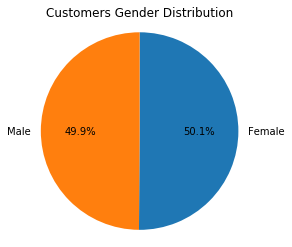

In [12]:
# plotting pie chart
pie_chart(gender, 'Customers Gender Distribution')

### Payment

In [13]:
# getting value counts of user_type
payment = sup_data['Payment'].value_counts()
payment

Ewallet        345
Cash           344
Credit card    311
Name: Payment, dtype: int64

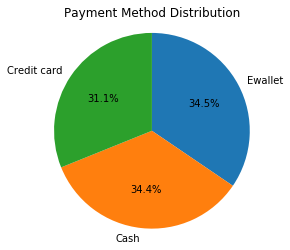

In [14]:
# plotting pie chart
pie_chart(payment, 'Payment Method Distribution')

### Customer Type

In [15]:
# getting value counts of user_type
cust_type = sup_data['Customer type'].value_counts()
cust_type

Member    501
Normal    499
Name: Customer type, dtype: int64

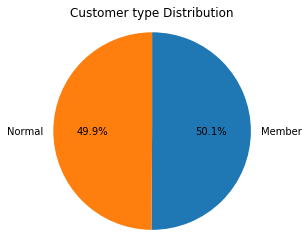

In [16]:
# plotting pie chart
pie_chart(cust_type, 'Customer type Distribution')

### Branch

In [17]:
# getting value counts of user_type
branch = sup_data['Branch'].value_counts()
branch

A    340
B    332
C    328
Name: Branch, dtype: int64

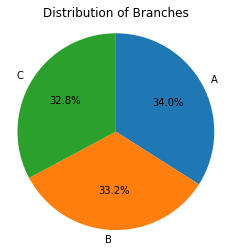

In [18]:
# plotting pie chart
pie_chart(branch, 'Distribution of Branches')

### City

In [19]:
# getting value counts of user_type
city = sup_data['City'].value_counts()
city

Yangon       340
Mandalay     332
Naypyitaw    328
Name: City, dtype: int64

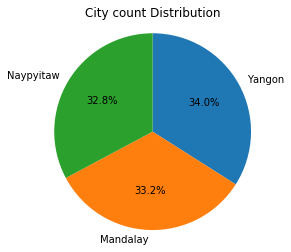

In [20]:
# plotting pie chart
pie_chart(city, 'City count Distribution')

### Product Line

In [21]:
# getting value counts of user_type
prdct_line = sup_data['Product line'].value_counts()
prdct_line

Fashion accessories       178
Food and beverages        174
Electronic accessories    170
Sports and travel         166
Home and lifestyle        160
Health and beauty         152
Name: Product line, dtype: int64

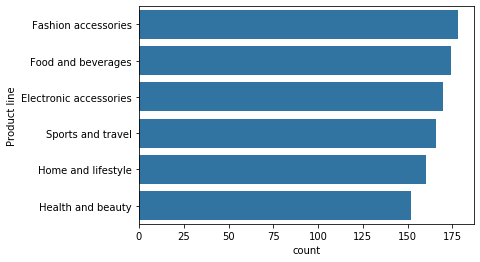

In [22]:
base_color = sb.color_palette()[0]

type_order = sup_data['Product line'].value_counts().index
sb.countplot(data = sup_data, y = 'Product line', color = base_color, order = type_order);

### Relationships to look at

1. Univariate analysis.

#### Bivariate and Multivariate

- Compare sales in each branch
- Compare trends for customer type, gender
- Scrutinize product lines e.g pricing and gender preferences
- Dates with highest sales and peak times per day
- Compare payment methods across target demographics
- Ratings across product lines
- Cheap or expensive product lines